In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [41]:
# ms = pd.read_csv('data/psfa_microsoft.csv')
ms = pd.read_csv('data/psfa_facebook.csv')

In [42]:
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


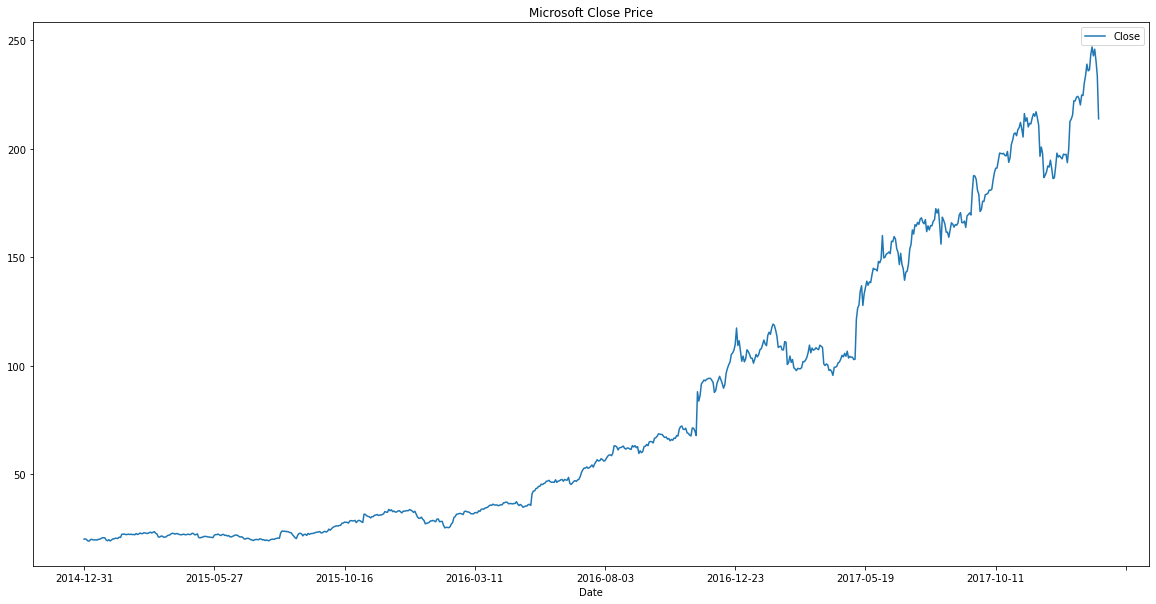

In [43]:
ms.plot(figsize=(20,10), title='Microsoft Close Price', x='Date', y='Close')

In [44]:
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

In [45]:
ms

,Date,Open,High,Low,Close,Adj Close,Volume,LogReturn
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,0.003982
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,-0.017034
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,-0.030787
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,-0.002609
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,0.036927
...,...,...,...,...,...,...,...,...
775,2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,0.012610
776,2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,-0.021798
777,2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,-0.029452
778,2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,-0.088695


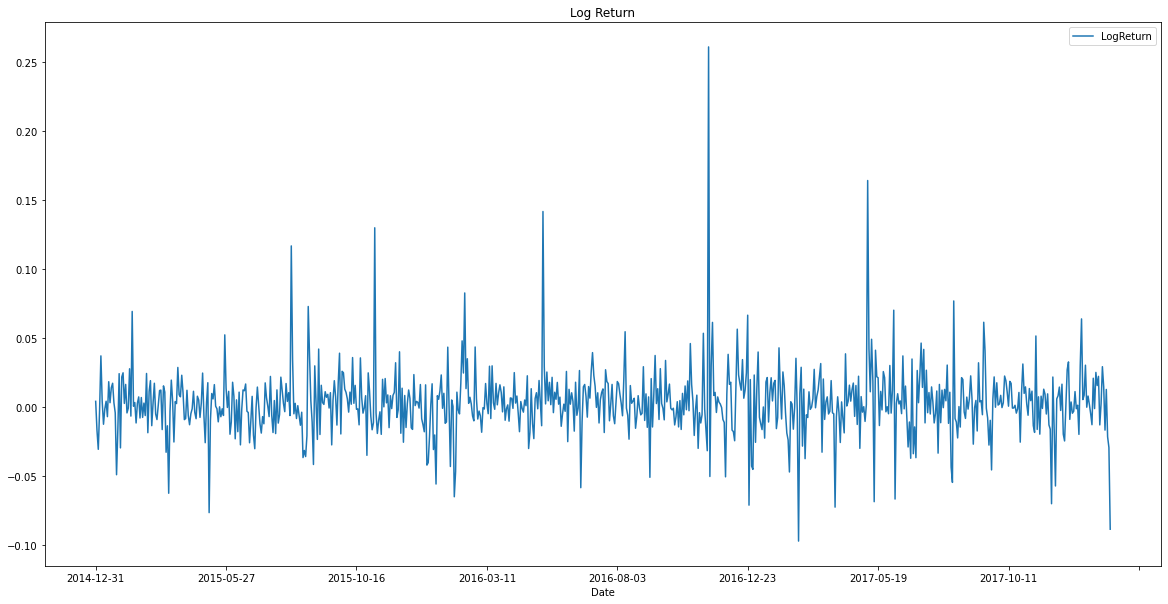

In [46]:
ms.plot(figsize=(20,10), title='Log Return', x='Date', y='LogReturn')

0.0030376688631700453 0.025061818594986074


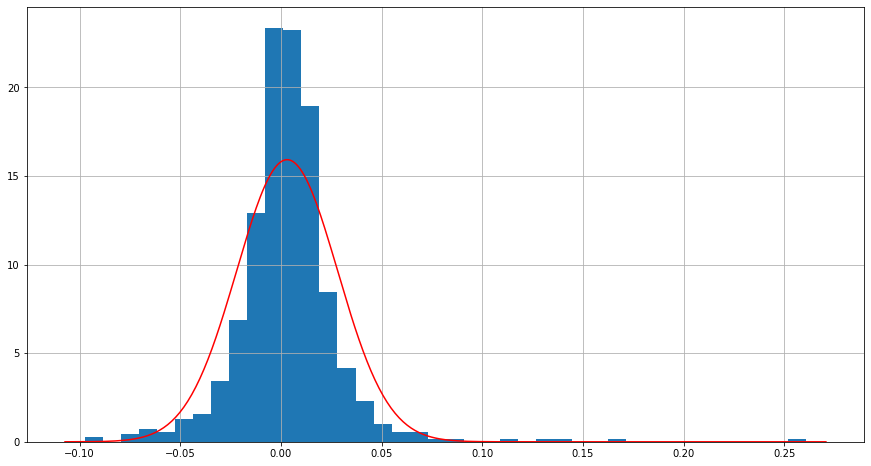

In [47]:
from scipy.stats import norm
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()

density['x'] = np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)

density['pdf'] = norm.pdf(density['x'], mu, sigma)

ms['LogReturn'].hist(bins=40, figsize=(15, 8), density=True)
plt.plot(density['x'], density['pdf'], color='red')

print(mu, sigma)

# Probabilidad de que el retorno caiga más de un 1% en un día

In [48]:
R_hoy = 40.3
R_ayer = 41.1
R_hoy/R_ayer

0.9805352798053527

In [49]:
np.log(R_hoy/R_ayer)

-0.019656652549551713

In [50]:
umbral = np.log(1-0.01)
umbral

-0.01005033585350145

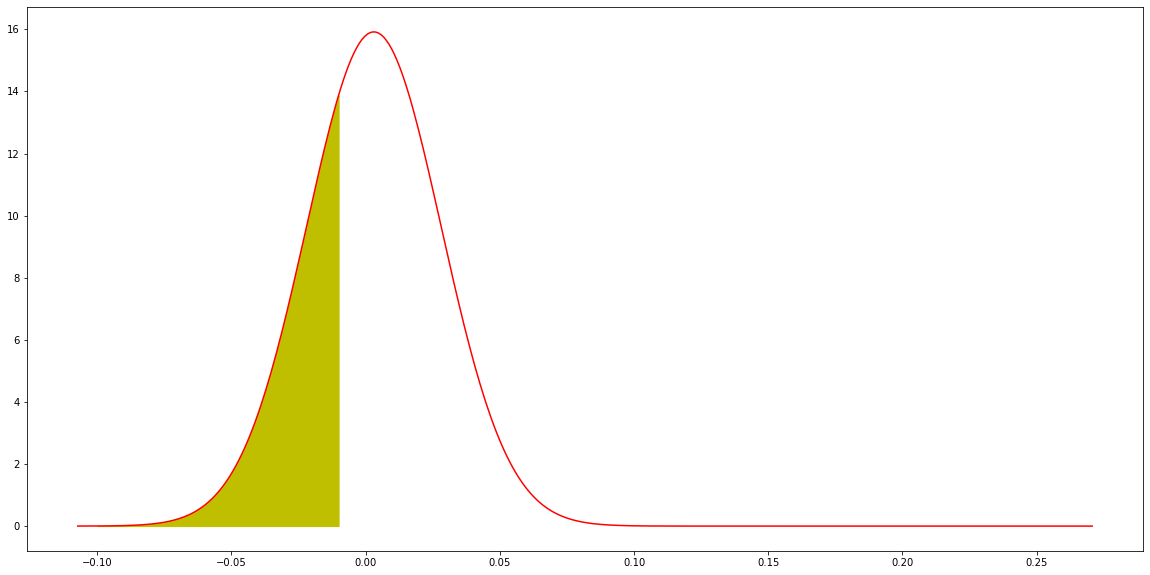

In [51]:
plt.figure(figsize=(20,10))
plt.plot(density['x'], density['pdf'], color='red')
rango = np.arange(-0.1, umbral, 0.0001)
plt.fill_between(rango, norm.pdf(rango, mu, sigma), y2=0, color='y')

In [53]:
norm.cdf(umbral, mu, sigma)

0.3007555004195702

# En un año

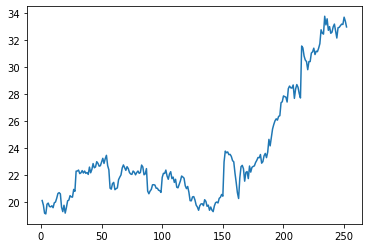

In [54]:
filtro = (ms['Date'] > '2015') & (ms['Date'] < '2016')

ms[filtro]['Close'].plot()

In [59]:
N = len(ms[filtro])
N

252

In [60]:
# suponemos que son independientes (En realidad no lo sos)

mu_year = N*mu
sigma_year = (N**0.5) * sigma

In [62]:
mu_year, sigma_year

(0.7654925535188514, 0.39784403643208405)

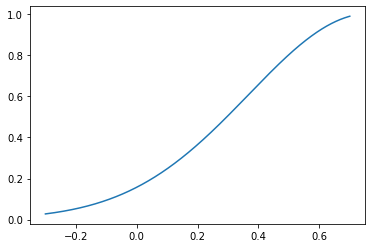

In [67]:
rango_year = np.arange(-0.3, 0.7, 0.0001)
pdf_year = norm.pdf(rango_year, mu_year, sigma_year)
plt.plot(rango_year, pdf_year)

In [69]:
norm.cdf(umbral, mu_year, sigma_year)

0.02562597819543425

# Semanal

In [70]:
mu_semanal = 7*mu
sigma_semanal = (7**0.5) * sigma
pdf_semanal = norm.pdf(rango_year, mu_semanal, sigma_semanal)

# Mensual

In [71]:
mu_mensual = 30*mu
sigma_mensual = (30**0.5) * sigma
pdf_mensual = norm.pdf(rango_year, mu_mensual, sigma_mensual)

# Comparación de un año vs día

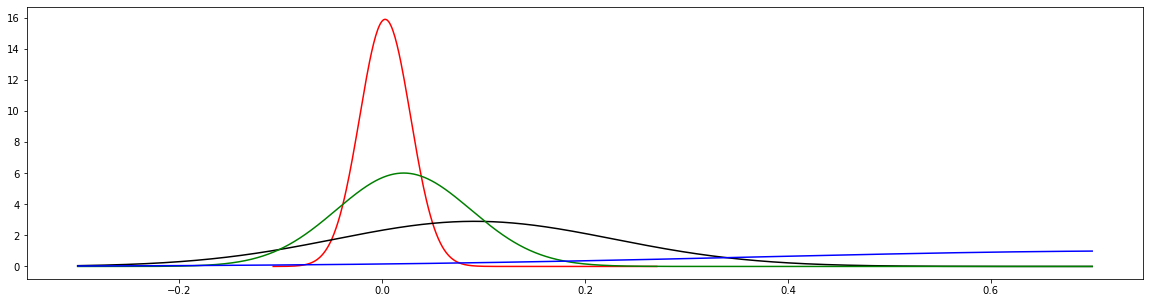

In [72]:
plt.figure(figsize=(20,5))
pdf_year = norm.pdf(rango_year, mu_year, sigma_year)

plt.plot(density['x'], density['pdf'], color='red')
plt.plot(rango_year, pdf_mensual, color='k')
plt.plot(rango_year, pdf_semanal, color='g')
plt.plot(rango_year, pdf_year, c='b')

# Probabilidad de caer un 20% en un año

In [78]:
umbral_year = np.log(0.8)

In [79]:
umbral_year

-0.2231435513142097

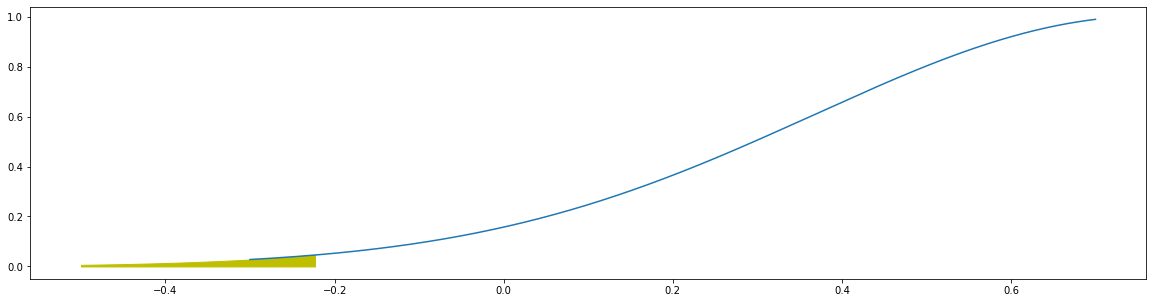

In [80]:
plt.figure(figsize=(20,5))
plt.plot(rango_year, pdf_year)
rango_year_2 = np.arange(-0.5, umbral_year, 0.0001)
plt.fill_between(rango_year_2, norm.pdf(rango_year_2, mu_year, sigma_year), y2=0, color='y')

In [85]:
umbral = np.log(0.99)

In [86]:
norm.cdf(umbral, mu_year, sigma_year)

0.02562597819543425

In [87]:
norm.cdf(umbral, mu_mensual, sigma_mensual)

0.230532431793864

In [88]:
norm.cdf(umbral, mu_semanal, sigma_semanal)

0.3183721491585847

In [89]:
norm.cdf(umbral, mu, sigma)

0.3007555004195702

In [365]:
days = range(1, 300)
loss = 0.05
umbral = np.log(1-loss)

probs = []
for i in days:
    mu_n = i*mu
    sigma_n = (i**0.5)*sigma
    probs.append(norm.cdf(umbral, mu_n, sigma_n))

In [366]:
umbral

-0.05129329438755058

In [367]:
probs[6]

0.13692211088890582

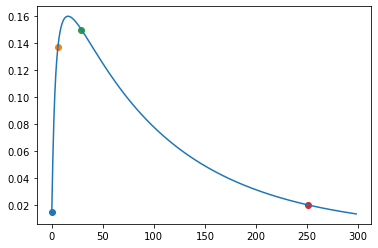

In [368]:
plt.plot(probs)
plt.scatter(0, probs[0])
plt.scatter(6, probs[6])
plt.scatter(29, probs[29])
plt.scatter(251, probs[251])

In [369]:
probs[-1]

0.013406559925652303

In [370]:
mu, sigma

(0.0030376688631700453, 0.025061818594986074)

# Valor en riesgo (Value at risk) - VaR - Por día

In [98]:
# Valor en riesgo de un 5% (1% y 5% son comunes. Y por día o por semana)
VaR = norm.ppf(0.05, mu, sigma)
print(VaR)

-0.038185354350792663


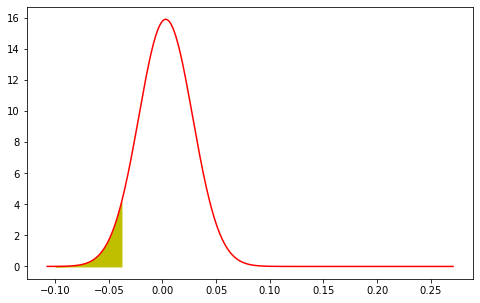

In [99]:
plt.figure(figsize=(8,5))
plt.plot(density['x'], density['pdf'], color='red')
rango = np.arange(-0.1, VaR, 0.0001)
plt.fill_between(rango, norm.pdf(rango, mu, sigma), y2=0, color='y')

In [100]:
np.exp(VaR)

0.9625345143956154

In [101]:
(1 - np.exp(VaR))*100

3.7465485604384563

# Percentiles

0.044260692077132735


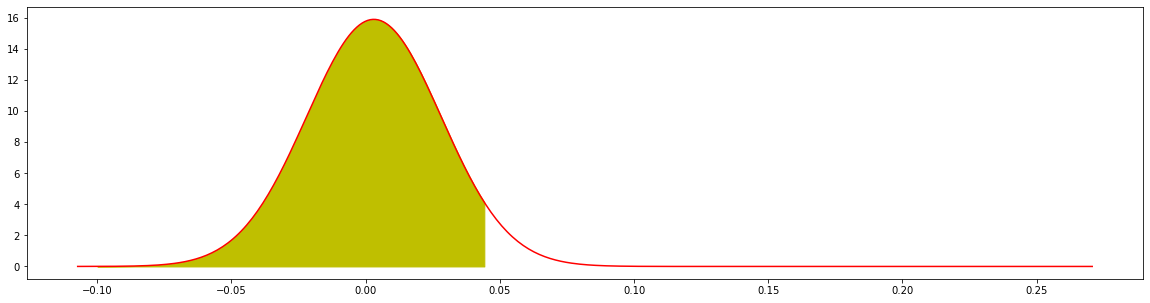

In [375]:
Q = norm.ppf(0.95, mu, sigma)

plt.figure(figsize=(20,5))
plt.plot(density['x'], density['pdf'], color='red')
rango = np.arange(-0.1, Q, 0.0001)
plt.fill_between(rango, norm.pdf(rango, mu, sigma), y2=0, color='y')
print(Q)